# Plot the time series of the Niño3.4 index

## 1. Load modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Read niño3.4 index

In [2]:
# Read index
df = pd.read_csv('nina34.anom.data', sep=r'\s+', header=None)
df.columns = ['years'] + [f'{month}' for month in range(1, 13)]
#df

In [3]:
years = np.arange(1980,2015)
nyr = len(years)
nino34_Jan = df['1'][(df['years'] >= 1980) & (df['years'] <= 2014)]

## 3. Identify years with El Niño and La Niña events

In [4]:
id_el = np.where(nino34_Jan>=1)
id_la = np.where(nino34_Jan<=-1)
id_ne = np.where((nino34_Jan>-1) &(nino34_Jan<1))

In [5]:
year_el = years[id_el]
year_la = years[id_la]
year_ne = years[id_ne]

In [6]:
nino34_Jan = np.array(nino34_Jan)
val_el = nino34_Jan[id_el]
val_la = nino34_Jan[id_la]

## 4. Plot

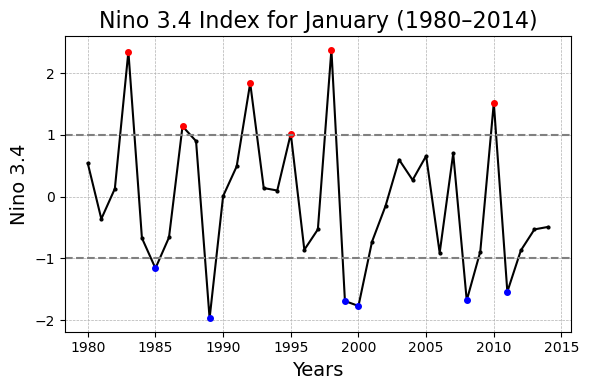

In [7]:
plt.figure(figsize=(6, 4))

# Plotting all points with black color first
plt.plot(years, nino34_Jan, marker='o', linestyle='-', color='black', markersize=2)

# Highlighting points that are greater (smaller) than the 1 (-1) in red (blue)
plt.plot(year_el, val_el, marker='o', linestyle='None', color='red', markersize=4)
plt.plot(year_la, val_la, marker='o', linestyle='None', color='blue', markersize=4)

# Adding a horizontal line for the threshold (-1 and 1)
plt.axhline(y=1, color='gray', linestyle='--') 
plt.axhline(y=-1, color='gray', linestyle='--')

plt.xlabel('Years', fontsize=14)  # Increase the font size
plt.ylabel('Nino 3.4', fontsize=14)  # Increase the font size
plt.title('Nino 3.4 Index for January (1980–2014)', fontsize=16)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.savefig('plot_ts_nino34.png')
plt.show()